#Recurrent Neural Network


# 1 - Data Preprocessing


##Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Mount Drive

In [ ]:
### Using Google Colab

1. Make sure you have the dataset files (`Google_Stock_Price_Train.csv`) uploaded to a folder named `MyDataset` in your Google Drive.
2. Run the notebook in Google Colab.
3. The script will mount your Google Drive and access the dataset from `/MyDrive/MyDataset/`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##File Access

In [ ]:
file_path = '/content/drive/MyDrive/MyDataset/Google_Stock_Price_Train.csv'
dataset_train = pd.read_csv(file_path)
training_set = dataset_train.iloc[:, 1:2].values

##Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

##Creating a data structure with 60 timesteps and 2 outputs

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

##Reshaping the data

In [ ]:
                              #Samples          #Timesteps      #Features
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#2 - Building the RNN


##Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

##Initializing the RNN

In [ ]:
regressor = Sequential() #Means you're building an empty model with one layer after another

##Adding the Sequential Layers

In [ ]:
#Adding the first LSTM layer + Dropout regularization to avoid overfitting
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Add a second LSTM layer + dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Add a third LSTM layer + dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Add a fourth LSTM layer + dropout regularization
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

#Add the output (fully connected) layer
regressor.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Compiling the RNN



In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

##Fitting the RNN to the training set

In [ ]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.1079
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0071
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0061
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0035
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - lo

#3 - Making the predictions and validating the results


##Getting the real stock price for 2017

In [ ]:
file_path = '/content/drive/My Drive/AI projects/Recurrent Neural Networks Project/Google_Stock_Price_Test.csv'
dataset_test = pd.read_csv(file_path)
real_stock_price = dataset_test.iloc[:, 1:2].values

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


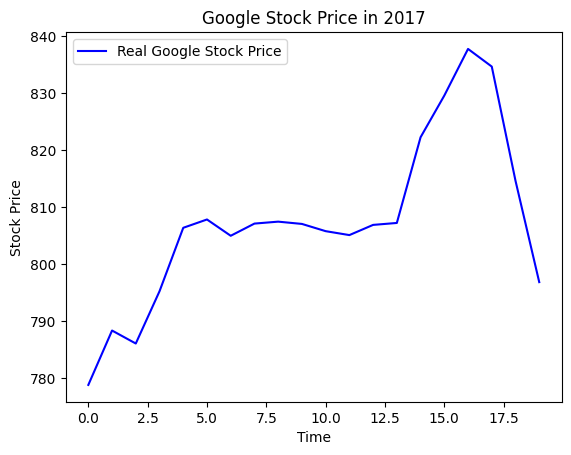

In [ ]:
print(real_stock_price)

import matplotlib.pyplot as plt

# Plot the real stock prices
plt.plot(real_stock_price, color='blue', label='Real Google Stock Price')

# Add titles and labels
plt.title('Google Stock Price in 2017')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Display legend
plt.legend()

# Show the plot
plt.show()


##Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[785.7439 ]
 [782.72235]
 [782.2735 ]
 [783.52875]
 [786.97235]
 [793.03046]
 [799.07025]
 [802.1358 ]
 [802.715  ]
 [802.17084]
 [801.5534 ]
 [801.16583]
 [801.0544 ]
 [801.6235 ]
 [802.6332 ]
 [806.84174]
 [813.7234 ]
 [821.62366]
 [826.6422 ]
 [823.6802 ]]


##Visualizing the results

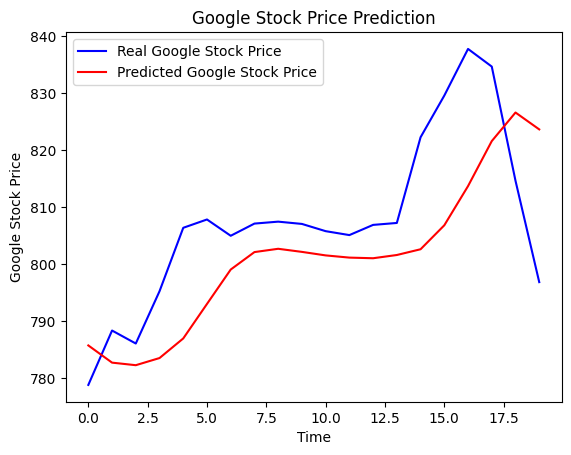

In [ ]:
plt.plot(real_stock_price, color='blue', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()